<a href="https://colab.research.google.com/github/erenofc28/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split , cross_val_score , RandomizedSearchCV
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
df = pd.read_csv('/content/car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
cat_cols = ["Car_Name","Year","Fuel_Type","Seller_Type","Transmission"]
for col in cat_cols:
  df[col] = sklearn.preprocessing.LabelEncoder().fit_transform(df[col])

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,11,3.35,5.59,27000,2,0,1,0
1,93,10,4.75,9.54,43000,1,0,1,0
2,68,14,7.25,9.85,6900,2,0,1,0
3,96,8,2.85,4.15,5200,2,0,1,0
4,92,11,4.60,6.87,42450,1,0,1,0


In [ ]:
X = df.drop(columns=["Selling_Price"])
y = df["Selling_Price"]

In [ ]:
X.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,11,5.59,27000,2,0,1,0
1,93,10,9.54,43000,1,0,1,0
2,68,14,9.85,6900,2,0,1,0
3,96,8,4.15,5200,2,0,1,0
4,92,11,6.87,42450,1,0,1,0


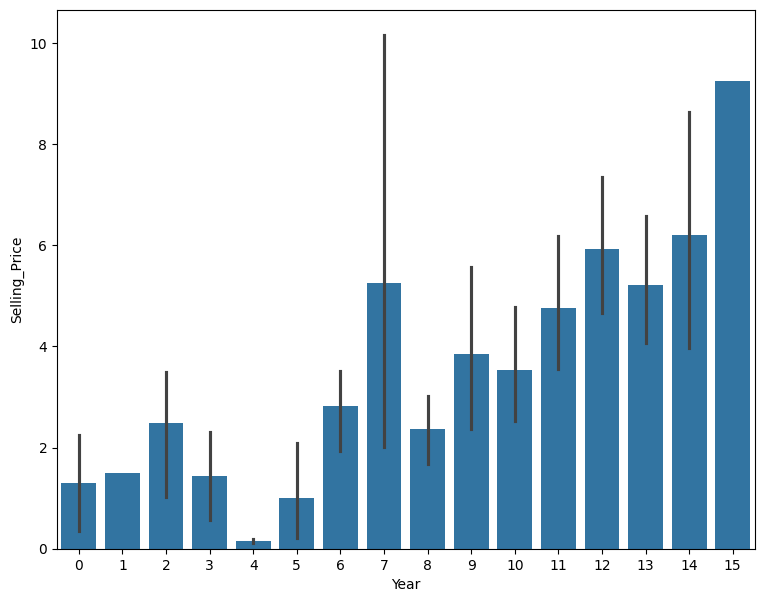

In [ ]:
plt.figure(figsize=(9,7))
sns.barplot(x= X["Year"],y=y)
plt.show()

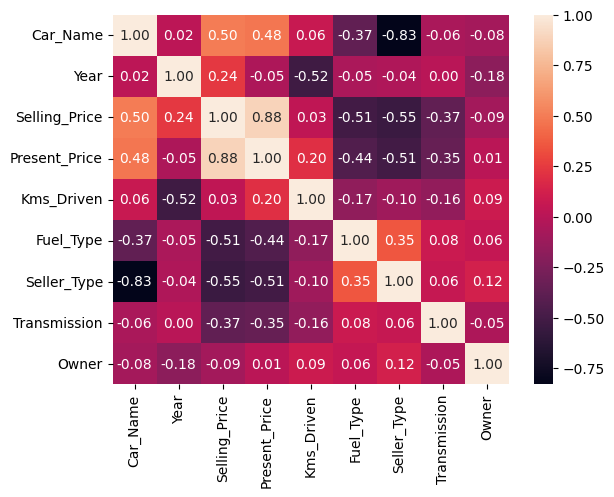

In [ ]:
sns.heatmap(df.corr(),fmt=".2f",annot=True)
plt.show()

In [ ]:
models = {
    "linear":sklearn.linear_model.LinearRegression(),
    "lasso":sklearn.linear_model.Lasso(),
    "ridge":sklearn.linear_model.Ridge(),
    "xgb":XGBRegressor()
}

In [ ]:
res = {}
for model_name , model in models.items():
  scores = cross_val_score(model,X,y,cv= 5,scoring = "neg_mean_absolute_error")
  res[model_name] = [scores.mean(),np.std(scores)]

In [ ]:
for model , scores in res.items():
  print(model," ","score : ",scores[0]," std dev : ",scores[1])

linear   score :  -1.5044406440068514  std dev :  0.5605190446597379
lasso   score :  -1.431274330144678  std dev :  0.6346508836985834
ridge   score :  -1.4951830544697797  std dev :  0.5666099361476661
xgb   score :  -0.8698965489539618  std dev :  0.5719500326264578


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,y,random_state=3,train_size=0.8)

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(x_train)
x_train[x_train.columns] = scaler.transform(x_train[x_train.columns])
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])

In [ ]:
params = {
    "reg_alpha":[0.2,0.1,0.5,0.4,1],
    "max_depth":[3,4,5],
    "n_estimators":[100,200,500],
     "learning_rate":[0.5,0.6,0.1]
}

In [ ]:
model = models["xgb"]
randomsearch = RandomizedSearchCV(model,params,n_iter=10,cv=5,scoring="neg_mean_absolute_error")
randomsearch.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'learning_rate': [0.5, 0.6, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 500],
                                        'reg_alpha': [0.2, 0.1, 0.5, 0.4, 1]},
                   scoring='neg_mean_absolute_error')

In [ ]:
best_score = randomsearch.best_score_
best_params = randomsearch.best_params_


In [ ]:
print("best score : ",best_score)
print("best params : ",best_params)

best score :  -0.6263123715811719
best params :  {'reg_alpha': 0.5, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.6}


In [ ]:
model = XGBRegressor(**best_params)

In [ ]:
model.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.6, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred = model.predict(x_train)
MAE = mean_absolute_error(y_train , pred)
r2 = r2_score(y_train , pred)
print("train MAE : ",MAE)
print("train r2 score : ",r2)

train MAE :  0.0884454197101295
train r2 score :  0.9994365097124729


In [ ]:
pred = model.predict(x_test)
MAE = mean_absolute_error(y_test , pred)
r2 = r2_score(y_test , pred)
print("test MAE : ",MAE)
print("test r2 score : ",r2)

test MAE :  0.5193138496651025
test r2 score :  0.9627669637136369


In [ ]:
input = (90	,11,	5.59,	27000	,2	,0	,1	,0)
input = np.asarray(input)
input = input.reshape(1,-1)
input = scaler.transform(input)
pred = model.predict(input)
print(pred) # actual value 3.35

[3.3280876]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
X.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,11,5.59,27000,2,0,1,0
1,93,10,9.54,43000,1,0,1,0
2,68,14,9.85,6900,2,0,1,0
3,96,8,4.15,5200,2,0,1,0
4,92,11,6.87,42450,1,0,1,0


In [ ]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [ ]:
y.min()

0.1

In [ ]:
y.max()

35.0

In [ ]:
X.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,11,5.59,27000,2,0,1,0
1,93,10,9.54,43000,1,0,1,0
2,68,14,9.85,6900,2,0,1,0
3,96,8,4.15,5200,2,0,1,0
4,92,11,6.87,42450,1,0,1,0


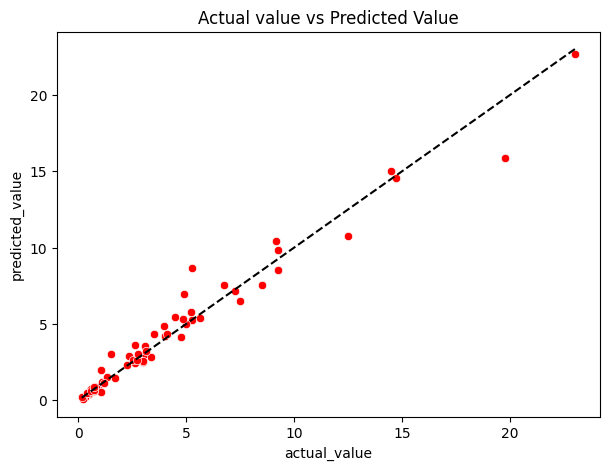

In [ ]:
pred = model.predict(x_test)
plt.figure(figsize=(7,5))
sns.scatterplot(x = y_test , y =pred ,color='red' )
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"--",color="black")
plt.title("Actual value vs Predicted Value")
plt.xlabel("actual_value")
plt.ylabel("predicted_value")
plt.show()

In [ ]:
X.shape

(301, 8)